In [1]:
require(ggplot2)
require(ggvis)
require(gridExtra)

Loading required package: ggplot2

Loading required package: ggvis

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘ggvis’”
Loading required package: gridExtra



In [2]:
options(jupyter.plot_mimetypes = 'image/png')

In [3]:
fake_data <- sapply(c(3, 4, 5), function (x) rnorm(10, x))

In [4]:
fake_data_frame = data.frame(fake_data)

In [5]:
fake_data_frame["model_id"] <- rownames(fake_data_frame)

In [6]:
fake_data_frame

X1,X2,X3,model_id
<dbl>,<dbl>,<dbl>,<chr>
0.2871691,3.509800,4.197031,1
3.0184325,2.904180,3.191550,2
2.9463256,2.140136,6.621672,3
4.6330963,2.300311,4.269229,4
2.3674430,5.582902,7.150849,5
4.1599826,4.522359,5.192299,6
2.7656976,3.778295,5.297450,7
4.2733294,2.743307,5.655653,8
2.7663767,3.530483,4.659773,9


In [7]:
library(tidyr)

In [8]:
long_version <- fake_data_frame %>% gather("model_version", "score", X1:X3)
long_version

model_id,model_version,score
<chr>,<chr>,<dbl>
1,X1,0.2871691
2,X1,3.0184325
3,X1,2.9463256
4,X1,4.6330963
5,X1,2.3674430
6,X1,4.1599826
7,X1,2.7656976
8,X1,4.2733294
9,X1,2.7663767


In [9]:
mytheme <- theme_classic() %+replace% 
        theme(axis.title.x = element_blank(), 
        axis.title.y = element_text(face="bold",angle=90))  

In [10]:
p1 <- ggplot(data = long_version, aes(x = model_version, y = score, group = model_id)) +
    mytheme +
    coord_trans(limy=c(0,10)) +
    labs(list(title = "Score for model variant ...", y = paste("MSE over x-fold CV"))) + 
    geom_line(size=1) + theme(legend.position="none")

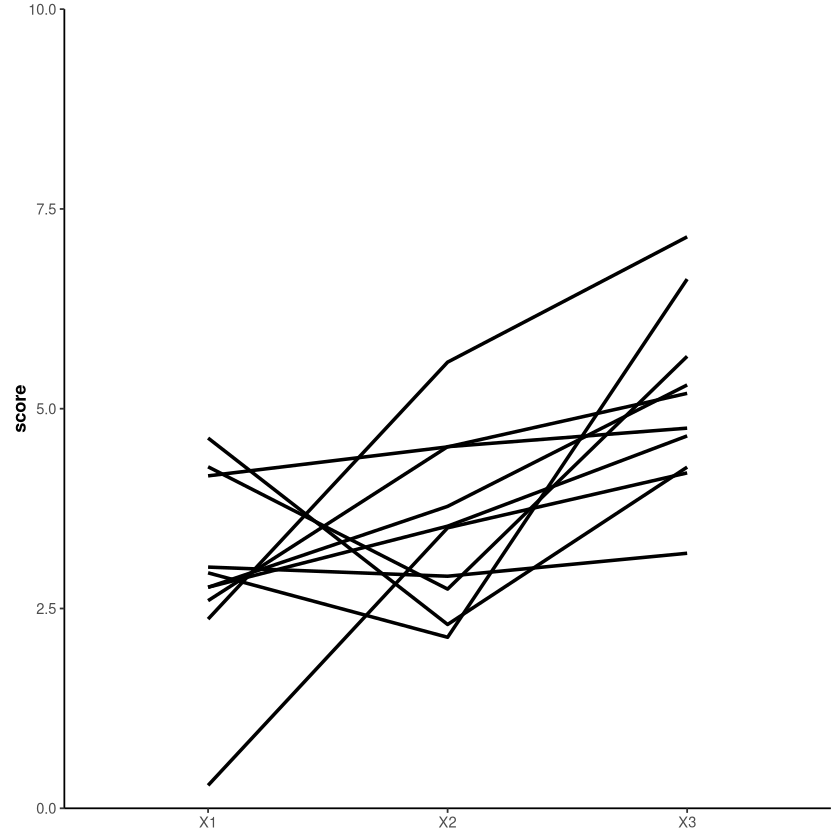

In [11]:
p1